## Setup and requirements

In [1]:
from IPython.display import Audio
import torchaudio
from stable_ssl.utils import seed_everything
from ssl_bioacoustics.visualization import *
from ssl_bioacoustics.custom_transforms import EnvironmentalNoise, Spectrogram
from ssl_bioacoustics.custom_datasets import UrbanSoundDataset, AudioDataset
from ssl_bioacoustics.custom_datasets import FrozenNoiseDataset

seed_everything(0)

/oscar/home/vsharm44/projects/ssl-bioacoustics/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Plotting Utils

In [5]:
def return_datasets(
    dataset=AudioDataset,
    noise_transform=None,
    waveform_transform=None,
    mel_transform=None,
    # stft_transform=None,
    # cqt_transform=None,
    # mfcc_transform=None,
    **kwargs):

    waveform_dataset = FrozenNoiseDataset(
        dataset=dataset,
        noise_transform=noise_transform,
        transform=waveform_transform,
        **kwargs)

    mel_dataset = FrozenNoiseDataset(
        dataset=dataset,
        noise_transform=noise_transform,
        transform=mel_transform,
        **kwargs)

    # stft_dataset = FrozenNoiseDataset(
    #     dataset=dataset,
    #     noise_transform=noise_transform,
    #     transform=stft_transform,
    #     **kwargs)

    # cqt_dataset = FrozenNoiseDataset(
    #     dataset=dataset,
    #     noise_transform=noise_transform,
    #     transform=cqt_transform,
    #     **kwargs)

    # mfcc_dataset = FrozenNoiseDataset(
    #     dataset=dataset,
    #     noise_transform=noise_transform,
    #     transform=mfcc_transform,
    #     **kwargs)

    return (waveform_dataset, mel_dataset)  #, stft_dataset, cqt_dataset, mfcc_dataset)

In [6]:
def plot_current_noise(plt_row, noise, axes, waveform, mel, pitch):  #, stft, cqt, mfcc, pitch):
    if len(axes.shape) == 1:
        ax1 = axes[0]
    else:
        ax1 = axes[plt_row, 0]
    plot_waveform(waveform, 32000, title="Waveform-" + str(noise), axis=ax1)

    if len(axes.shape) == 1:
        ax2 = axes[1]
    else:
        ax2 = axes[plt_row, 1]
    plot_spectrogram(mel, title="Mel-" + str(noise), axis=ax2, pil_image=True)


    if len(axes.shape) == 1:
        ax3 = axes[2]
    else:
        ax3 = axes[plt_row, 2]
    plot_pitch(waveform, 32000, pitch=pitch, title="Pitch-" + str(noise), axis=ax3)

    # ax3 = axes[plt_row, 2]
    # plot_spectrogram(stft, title="STFT-" + str(noise), axis=ax3)

    # ax4 = axes[plt_row, 3]
    # plot_spectrogram(cqt, title="CQT-" + str(noise), axis=ax4)

    # ax5 = axes[plt_row, 4]
    # plot_spectrogram(mfcc, title="MFCC-" + str(noise), axis=ax5)

    # ax6 = axes[plt_row, 5]
    # plot_pitch(waveform, 32000, pitch=pitch, title="Pitch-" + str(noise), axis=ax6)

## Plotting

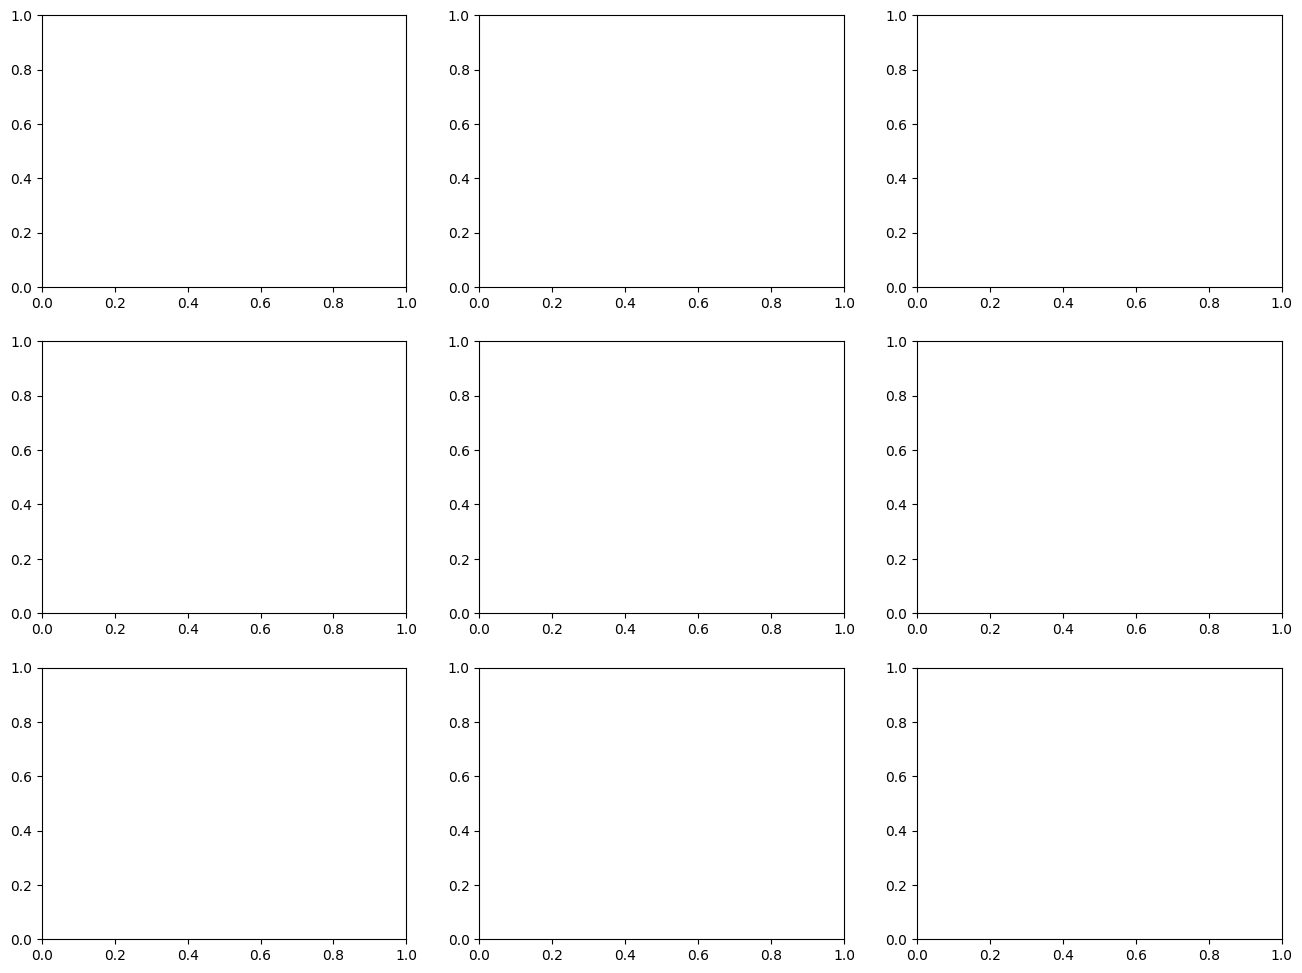

In [64]:
size = (16, 12)
individual_figure = False
if not individual_figure:
    total_rows = 3
    fig, axes = plt.subplots(total_rows, 3, figsize=size)
plt_row = -1


In [65]:
idx = 9

## Clean Plot

In [66]:
if individual_figure:
    fig, axes = plt.subplots(1, 3, figsize=size)
    plt_row = 0
else:
    plt_row += 1
    if plt_row > total_rows:
        raise ValueError("Number of rows exceeded in the plot, increase total_rows variable in the code.")

kwargs = {
    'root_dir': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/',
    'meta_file': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/train.csv',
    'split': 'train',
    'sampling_rate': 32000,
    'length': 7,
    'offset': 0,
}

noise_transform = None
waveform_transform = None

mel_transform = Spectrogram(
    sampling_rate=32000,
    representation='power_mel',
    convert_to_db=True,
    representation_mode='rgb',
    kwargs={'n_mels': 128, 'n_fft': 2048, 'hop_length': 512},
    )

# cqt_transform = Spectrogram(
#     sampling_rate=22000,
#     representation='power_cqt',
#     convert_to_db=True,
#     representation_mode='raw',
#     )

# stft_transform = Spectrogram(
#     sampling_rate=22000,
#     representation='power_stft',
#     convert_to_db=True,
#     representation_mode='raw',
#     )

# mfcc_transform = Spectrogram(
#     sampling_rate=22000,
#     representation='mfcc',
#     convert_to_db=False,
#     representation_mode='raw',
#     )

noise='Clean'
# waveform_dataset, mel_dataset, stft_dataset, cqt_dataset, mfcc_dataset = return_datasets(
waveform_dataset, mel_dataset = return_datasets(dataset=AudioDataset,
                                                noise_transform=noise_transform,
                                                waveform_transform=waveform_transform,
                                                mel_transform=mel_transform,
                                                # stft_transform=stft_transform,
                                                # cqt_transform=cqt_transform,
                                                # mfcc_transform=mfcc_transform,
                                                **kwargs
                                                )

waveform, _ = waveform_dataset[idx]
mel, _ = mel_dataset[idx]
# stft, _ = stft_dataset[0]
# cqt, _ = cqt_dataset[0]
# mfcc, _ = mfcc_dataset[0]
print(noise, type(waveform), type(mel))  #, type(stft), type(cqt), type(mfcc))

pitch = torchaudio.functional.detect_pitch_frequency(torch.tensor(waveform), 32000)

plot_current_noise(plt_row, noise, axes, waveform, mel, pitch)  #, stft, cqt, mfcc, pitch)

Clean <class 'numpy.ndarray'> <class 'PIL.Image.Image'>


In [67]:
print("Clean audio sample, idx:", idx)
Audio(waveform, rate=32000)

Clean audio sample, idx: 9


# Natural Corruptions using CBC2020 and Soundscapes from XC

## SNR 1st value

In [68]:
if individual_figure:
    fig, axes = plt.subplots(1, 3, figsize=size)
    plt_row = 0
else:
    plt_row += 1
    if plt_row > total_rows:
        raise ValueError("Number of rows exceeded in the plot, increase total_rows variable in the code.")

kwargs = {
    'root_dir': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/',
    'meta_file': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/train.csv',
    'split': 'train',
    'sampling_rate': 32000,
    'length': 7,
    'offset': 0,
}

noise_kwargs = {
    'root_dir': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/',
    'meta_file': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/noise.csv',
    'split': 'noise',
    'sampling_rate': 32000,
    'length': 7,
    'offset': 0,
}

snr=10
cbc2020_noise = EnvironmentalNoise(
    noise_source=AudioDataset,
    snr=snr,
    **noise_kwargs
    )

noise = f'Noise, SNR: {snr}'
# waveform_dataset, mel_dataset, stft_dataset, cqt_dataset, mfcc_dataset = return_datasets(
waveform_dataset, mel_dataset = return_datasets(dataset=AudioDataset,
                                                noise_transform=cbc2020_noise,
                                                waveform_transform=waveform_transform,
                                                mel_transform=mel_transform,
                                                # stft_transform=stft_transform,
                                                # cqt_transform=cqt_transform,
                                                # mfcc_transform=mfcc_transform,
                                                **kwargs
                                                )

waveform, _ = waveform_dataset[idx]
mel, _ = mel_dataset[idx]
# stft, _ = stft_dataset[0]
# cqt, _ = cqt_dataset[0]
# mfcc, _ = mfcc_dataset[0]
print(noise, type(waveform), type(mel))  #, type(stft), type(cqt), type(mfcc))
# print(noise, waveform.shape, mel.shape, stft.shape, cqt.shape, mfcc.shape)
pitch = torchaudio.functional.detect_pitch_frequency(waveform, 32000)

plot_current_noise(plt_row, noise, axes, waveform, mel, pitch)  #, stft, cqt, mfcc, pitch)

Noise, SNR: 10 <class 'torch.Tensor'> <class 'PIL.Image.Image'>


In [69]:
print(f"{noise}, snr: {snr}, idx:", idx)
Audio(waveform, rate=32000)

Noise, SNR: 10, snr: 10, idx: 9


## SNR 2nd value:

In [70]:
if individual_figure:
    fig, axes = plt.subplots(1, 3, figsize=size)
    plt_row = 0
else:
    plt_row += 1
    if plt_row > total_rows:
        raise ValueError("Number of rows exceeded in the plot, increase total_rows variable in the code.")

kwargs = {
    'root_dir': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/',
    'meta_file': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/train.csv',
    'split': 'train',
    'sampling_rate': 32000,
    'length': 7,
    'offset': 0,
}

noise_kwargs = {
    'root_dir': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/',
    'meta_file': '/users/vsharm44/projects/ssl-bioacoustics/data/CBC2020/noise.csv',
    'split': 'noise',
    'sampling_rate': 32000,
    'length': 7,
    'offset': 0,
}

snr = 0.1
cbc2020_noise = EnvironmentalNoise(
    noise_source=AudioDataset,
    snr=snr,
    **noise_kwargs
    )

noise = f'Noise, SNR: {snr}'
# waveform_dataset, mel_dataset, stft_dataset, cqt_dataset, mfcc_dataset = return_datasets(
waveform_dataset, mel_dataset = return_datasets(dataset=AudioDataset,
                                                noise_transform=cbc2020_noise,
                                                waveform_transform=waveform_transform,
                                                mel_transform=mel_transform,
                                                # stft_transform=stft_transform,
                                                # cqt_transform=cqt_transform,
                                                # mfcc_transform=mfcc_transform,
                                                **kwargs
                                                )

waveform, _ = waveform_dataset[idx]
mel, _ = mel_dataset[idx]
# stft, _ = stft_dataset[0]
# cqt, _ = cqt_dataset[0]
# mfcc, _ = mfcc_dataset[0]
print(noise, type(waveform), type(mel))  #, type(stft), type(cqt), type(mfcc))
# print(noise, waveform.shape, mel.shape, stft.shape, cqt.shape, mfcc.shape)
pitch = torchaudio.functional.detect_pitch_frequency(waveform, 32000)

plot_current_noise(plt_row, noise, axes, waveform, mel, pitch)  #, stft, cqt, mfcc, pitch)

Noise, SNR: 0.1 <class 'torch.Tensor'> <class 'PIL.Image.Image'>


In [71]:
print(f"{noise}, snr: {snr}, idx:", idx)
Audio(waveform, rate=32000)

Noise, SNR: 0.1, snr: 0.1, idx: 9


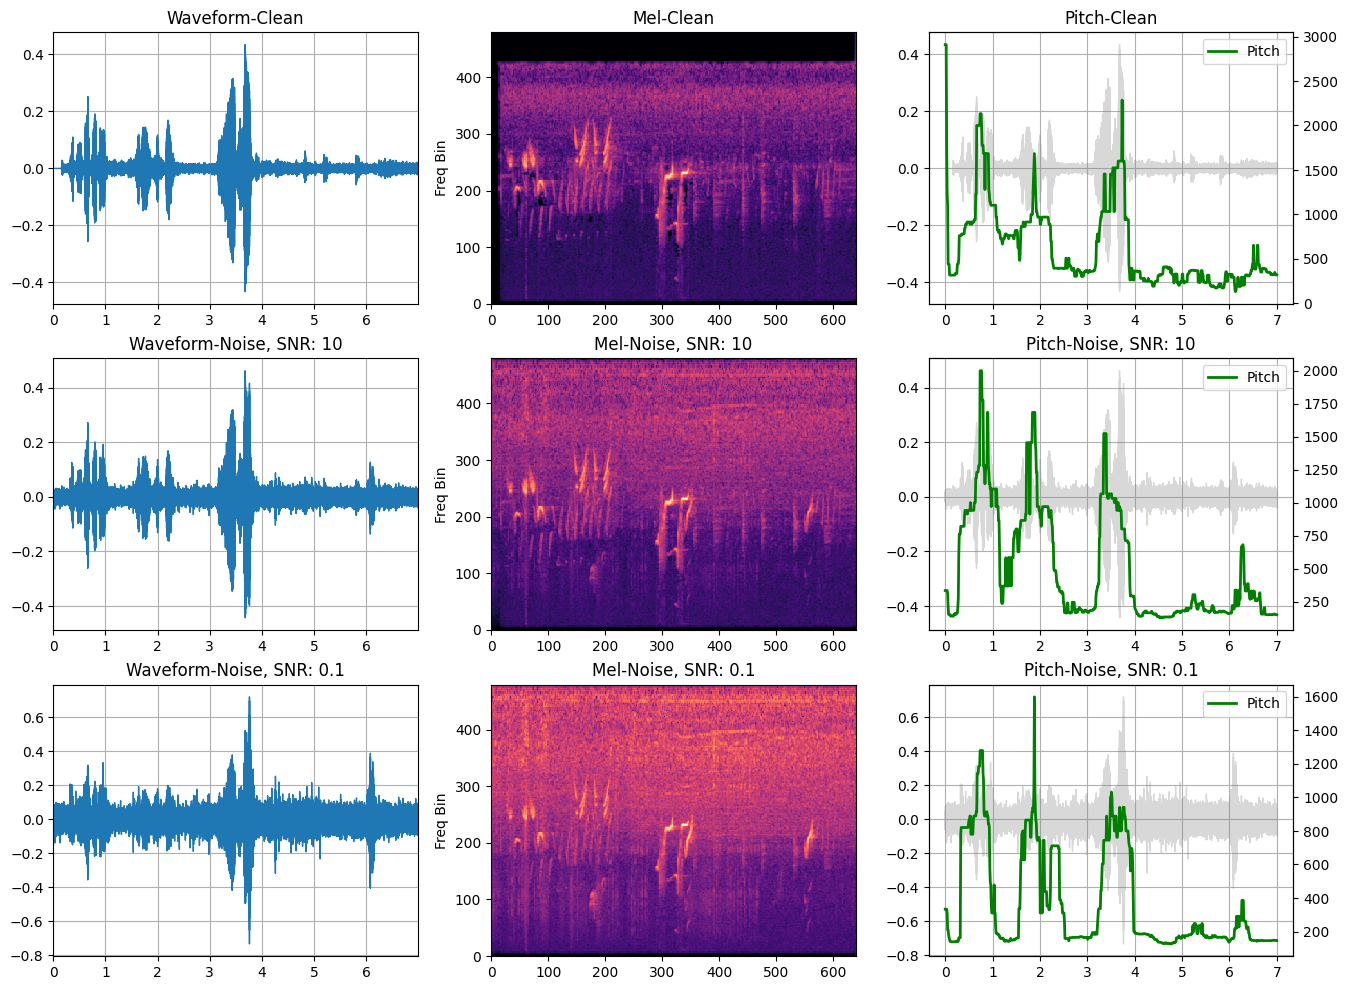

In [72]:
fig

> Deprecated!
## Natural Corruptions using UrbanSound8k

Types of available noise (classID, class):
* 0 = air_conditioner
* 1 = car_horn
* 2 = children_playing
* 3 = dog_bark
* 4 = drilling
* 5 = engine_idling
* 6 = gun_shot
* 7 = jackhammer
* 8 = siren
* 9 = street_music


In [36]:
if individual_figure:
    fig, axes = plt.subplots(1, 6, figsize=(40, 15))
    plt_row = 0
else:
    plt_row += 1

if plt_row > total_rows:
    raise ValueError("Number of rows exceeded in the plot, increase total_rows variable in the code.")

engine_idling = EnvironmentalNoise(
    sampling_rate=22000,
    noise_source=UrbanSoundDataset,
    classes='engine_idling',
    snr=10,
    csv_file='data/UrbanSound8k/metadata/UrbanSound8K.csv',
    root_dir='data/UrbanSound8k/audio',
    )

noise = 'engine_idling'
waveform_dataset, mel_dataset, stft_dataset, cqt_dataset, mfcc_dataset = return_datasets(
                                                                                        dataset=AudioDataset,
                                                                                        noise_transform=engine_idling,
                                                                                        waveform_transform=waveform_transform,
                                                                                        mel_transform=mel_transform,
                                                                                        stft_transform=stft_transform,
                                                                                        cqt_transform=cqt_transform,
                                                                                        mfcc_transform=mfcc_transform,
                                                                                        **kwargs
                                                                                        )

waveform, _ = waveform_dataset[0]
mel, _ = mel_dataset[0]
stft, _ = stft_dataset[0]
cqt, _ = cqt_dataset[0]
mfcc, _ = mfcc_dataset[0]
print(noise, type(waveform), type(mel), type(stft), type(cqt), type(mfcc))
print(noise, waveform.shape, mel.shape, stft.shape, cqt.shape, mfcc.shape)
pitch = torchaudio.functional.detect_pitch_frequency(waveform, 22000)

plot_current_noise(plt_row, noise, axes, waveform, mel, stft, cqt, mfcc, pitch)

engine_idling <class 'torch.Tensor'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
engine_idling torch.Size([228800]) (1, 256, 447) (1, 1025, 447) (1, 256, 447) (1, 256, 447)


In [37]:
print("Engine idling noise audio sample:")
Audio(waveform, rate=22000)

Engine idling noise audio sample:


In [38]:
if individual_figure:
    fig, axes = plt.subplots(1, 6, figsize=(40, 15))
    plt_row = 0
else:
    plt_row += 1

if plt_row > total_rows:
    raise ValueError("Number of rows exceeded in the plot, increase total_rows variable in the code.")

children_playing = EnvironmentalNoise(
    sampling_rate=22000,
    noise_source=UrbanSoundDataset,
    classes='children_playing',
    snr=10,
    csv_file='data/UrbanSound8k/metadata/UrbanSound8K.csv',
    root_dir='data/UrbanSound8k/audio',
    )

noise='children_playing'
waveform_dataset, mel_dataset, stft_dataset, cqt_dataset, mfcc_dataset = return_datasets(
                                                                                        dataset=AudioDataset,
                                                                                        noise_transform=children_playing,
                                                                                        waveform_transform=waveform_transform,
                                                                                        mel_transform=mel_transform,
                                                                                        stft_transform=stft_transform,
                                                                                        cqt_transform=cqt_transform,
                                                                                        mfcc_transform=mfcc_transform,
                                                                                        **kwargs
                                                                                        )

waveform, _ = waveform_dataset[0]
mel, _ = mel_dataset[0]
stft, _ = stft_dataset[0]
cqt, _ = cqt_dataset[0]
mfcc, _ = mfcc_dataset[0]
print(noise, type(waveform), type(mel), type(stft), type(cqt), type(mfcc))
print(noise, waveform.shape, mel.shape, stft.shape, cqt.shape, mfcc.shape)
pitch = torchaudio.functional.detect_pitch_frequency(waveform, 22000)  # already a tensor cause an output of transform environment noise. rest are output of spectrogram which returns PIL or np array

plot_current_noise(plt_row, noise, axes, waveform, mel, stft, cqt, mfcc, pitch)

children_playing <class 'torch.Tensor'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
children_playing torch.Size([228800]) (1, 256, 447) (1, 1025, 447) (1, 256, 447) (1, 256, 447)


In [39]:
print("Children playing noise audio sample:")
Audio(waveform, rate=22000)

Children playing noise audio sample:


In [40]:
if individual_figure:
    fig, axes = plt.subplots(1, 6, figsize=(40, 15))
    plt_row = 0
else:
    plt_row += 1

if plt_row > total_rows:
    raise ValueError("Number of rows exceeded in the plot, increase total_rows variable in the code.")

air_conditioner = EnvironmentalNoise(
    sampling_rate=22000,
    noise_source=UrbanSoundDataset,
    classes='air_conditioner',
    snr=10,
    csv_file='data/UrbanSound8k/metadata/UrbanSound8K.csv',
    root_dir='data/UrbanSound8k/audio',
    )

noise='air_conditioner'
waveform_dataset, mel_dataset, stft_dataset, cqt_dataset, mfcc_dataset = return_datasets(
                                                                                        dataset=AudioDataset,
                                                                                        noise_transform=air_conditioner,
                                                                                        waveform_transform=waveform_transform,
                                                                                        mel_transform=mel_transform,
                                                                                        stft_transform=stft_transform,
                                                                                        cqt_transform=cqt_transform,
                                                                                        mfcc_transform=mfcc_transform,
                                                                                        **kwargs
                                                                                        )

waveform, _ = waveform_dataset[0]
mel, _ = mel_dataset[0]
stft, _ = stft_dataset[0]
cqt, _ = cqt_dataset[0]
mfcc, _ = mfcc_dataset[0]
print(noise, type(waveform), type(mel), type(stft), type(cqt), type(mfcc))
print(noise, waveform.shape, mel.shape, stft.shape, cqt.shape, mfcc.shape)
pitch = torchaudio.functional.detect_pitch_frequency(waveform, 22000)  # already a tensor cause an output of transform environment noise. rest are output of spectrogram which returns PIL or np array

plot_current_noise(plt_row, noise, axes, waveform, mel, stft, cqt, mfcc, pitch)

air_conditioner <class 'torch.Tensor'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
air_conditioner torch.Size([228800]) (1, 256, 447) (1, 1025, 447) (1, 256, 447) (1, 256, 447)


In [41]:
print("Air conditioner noise audio sample:")
Audio(waveform, rate=22000)

Air conditioner noise audio sample:


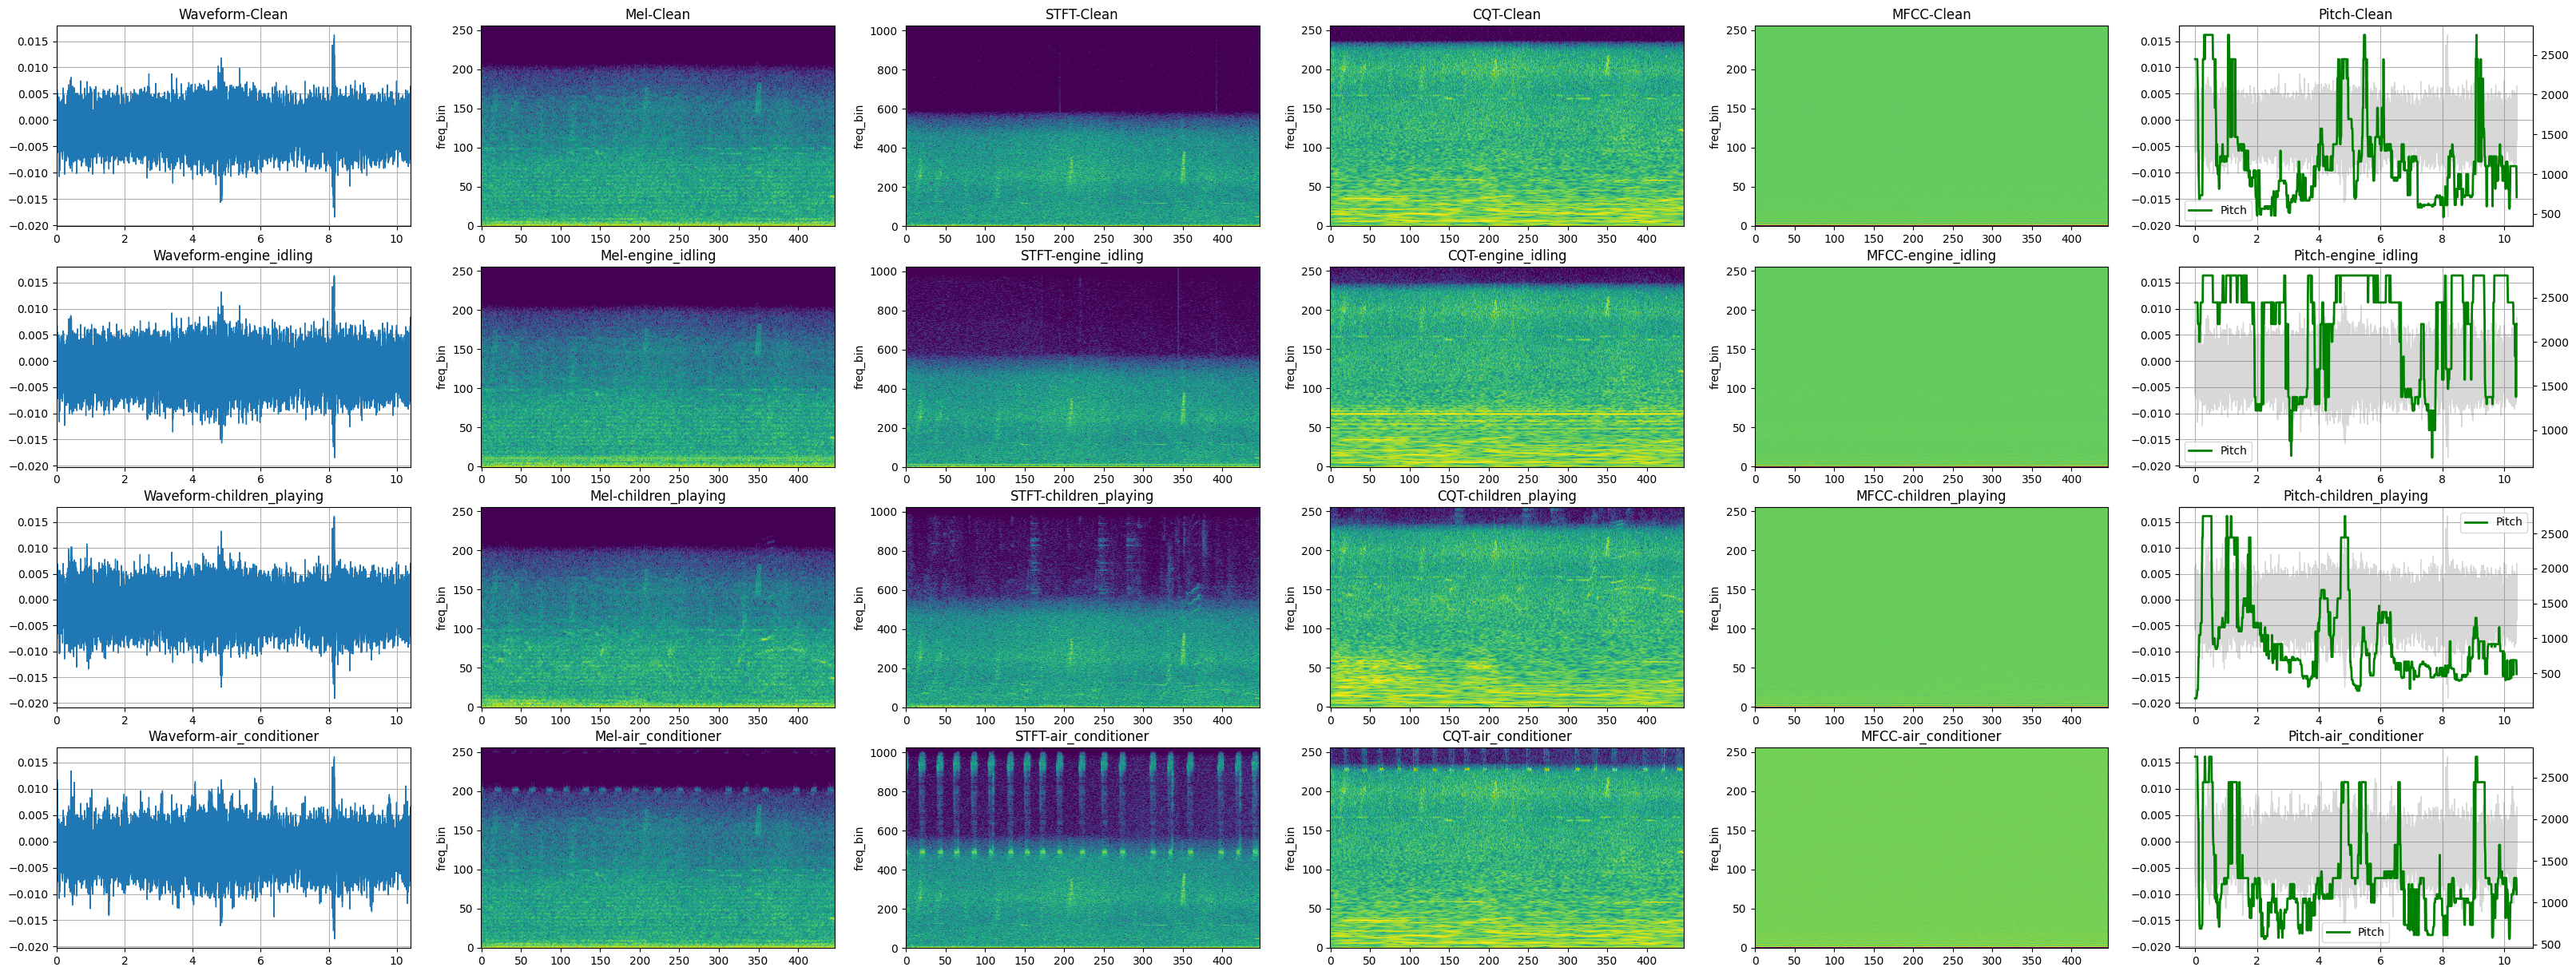

In [42]:
fig